<a href="https://colab.research.google.com/github/malika1906/Face-Mask-Detection-using-CNN-Model/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face Mask Detection using CNN


In [ ]:
!pip install kaggle


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Importing dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:04<00:00, 43.6MB/s]
100% 163M/163M [00:04<00:00, 37.0MB/s]


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


#Importing the Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2931.jpg', 'with_mask_555.jpg', 'with_mask_1562.jpg', 'with_mask_1661.jpg', 'with_mask_2390.jpg']
['with_mask_74.jpg', 'with_mask_3107.jpg', 'with_mask_613.jpg', 'with_mask_2215.jpg', 'with_mask_1263.jpg']


In [4]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_349.jpg', 'without_mask_1169.jpg', 'without_mask_455.jpg', 'without_mask_2909.jpg', 'without_mask_2076.jpg']
['without_mask_230.jpg', 'without_mask_2748.jpg', 'without_mask_2122.jpg', 'without_mask_2869.jpg', 'without_mask_1382.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))

Number of with mask images: 3725


In [ ]:
print('Number of without mask images:', len(without_mask_files))

Number of without mask images: 3828


#Creating Labels for the two class of Images

###with mask --> 1

###without mask --> 0

In [5]:
with_mask_labels=[1]*3725

In [6]:
without_mask_labels=[0]*3828

In [8]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#Displaying the Images


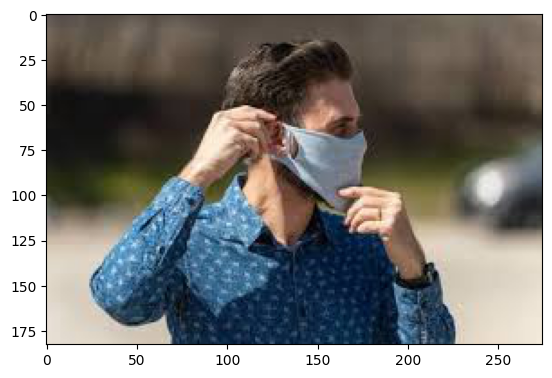

In [9]:
#displaying with mask image
img =mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')       #reading as numpy array

imgplot=plt.imshow(img)
plt.show()                                              #displaying as matplotlib plot


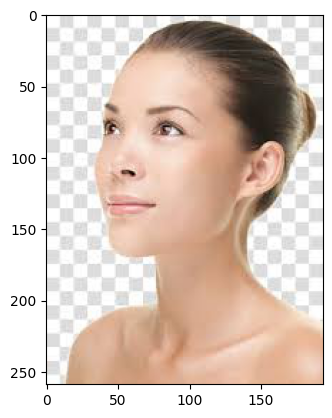

In [8]:
#displaying without mask image
img =mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')       #reading as numpy array

imgplot=plt.imshow(img)
plt.show()                                              #displaying as matplotlib plot

#Image Processing

1. Resize images
2. Convert images to numpy arrays

In [10]:
with_mask_path ='/content/data/with_mask/'

data=[]
for img_file in with_mask_files:
  image= Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




without_mask_path ='/content/data/without_mask/'

for img_file in without_mask_files:
  image= Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
len(data)

7553

In [14]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
type(data[0])

numpy.ndarray

In [12]:
data[0].shape

(128, 128, 3)

In [13]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)



In [14]:
type(X)
type(Y)

numpy.ndarray

In [15]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(X)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 73  63  64]
   [ 73  63  65]
   [ 71  61  63]
   ...
   [226 234 213]
   [226 235 214]
   [226 235 214]]

  [[ 70  60  60]
   [ 69  59  59]
   [ 67  57  57]
   ...
   [226 233 212]
   [228 236 215]
   [228 237 216]]

  [[ 67  57  56]
   [ 66  56  54]
   [ 64  54  53]
   ...
   [223 228 206]
   [226 234 213]
   [227 236

##Splitting into Training and Testing Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [18]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [18]:
print(X_train[0])

[[[185 195 203]
  [185 195 203]
  [185 195 203]
  ...
  [115 115 117]
  [116 116 117]
  [117 117 117]]

 [[186 197 202]
  [186 197 202]
  [186 197 202]
  ...
  [116 116 118]
  [115 115 116]
  [114 114 114]]

 [[186 197 203]
  [186 197 203]
  [186 197 203]
  ...
  [116 116 118]
  [117 117 118]
  [119 119 119]]

 ...

 [[200 216 222]
  [198 217 226]
  [203 219 226]
  ...
  [ 99 100 104]
  [103 104 109]
  [104 105 110]]

 [[200 216 222]
  [198 216 226]
  [203 219 226]
  ...
  [ 94  95  99]
  [103 104 109]
  [103 104 109]]

 [[200 214 221]
  [198 216 225]
  [203 217 225]
  ...
  [ 83  84  90]
  [ 96  98 103]
  [103 104 109]]]


In [19]:
X_train_scaled[0]

array([[[0.7254902 , 0.76470588, 0.79607843],
        [0.7254902 , 0.76470588, 0.79607843],
        [0.7254902 , 0.76470588, 0.79607843],
        ...,
        [0.45098039, 0.45098039, 0.45882353],
        [0.45490196, 0.45490196, 0.45882353],
        [0.45882353, 0.45882353, 0.45882353]],

       [[0.72941176, 0.77254902, 0.79215686],
        [0.72941176, 0.77254902, 0.79215686],
        [0.72941176, 0.77254902, 0.79215686],
        ...,
        [0.45490196, 0.45490196, 0.4627451 ],
        [0.45098039, 0.45098039, 0.45490196],
        [0.44705882, 0.44705882, 0.44705882]],

       [[0.72941176, 0.77254902, 0.79607843],
        [0.72941176, 0.77254902, 0.79607843],
        [0.72941176, 0.77254902, 0.79607843],
        ...,
        [0.45490196, 0.45490196, 0.4627451 ],
        [0.45882353, 0.45882353, 0.4627451 ],
        [0.46666667, 0.46666667, 0.46666667]],

       ...,

       [[0.78431373, 0.84705882, 0.87058824],
        [0.77647059, 0.85098039, 0.88627451],
        [0.79607843, 0

#Building Convolutional Neural Network

In [20]:
import tensorflow as tf
from tensorflow import keras


In [21]:
num_of_classes=2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))     #32,64,128,256,etc number of neurons
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))     #output layer


In [22]:
#compile neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [23]:
#training the neural network

history = model.fit(X_train_scaled, Y_train,validation_split=0.2, epochs=5)

Epoch 1/5
152/152 [==============================] - 16s 26ms/step - loss: 0.5328 - acc: 0.7674 - val_loss: 0.3763 - val_acc: 0.8412
Epoch 2/5
152/152 [==============================] - 3s 19ms/step - loss: 0.3157 - acc: 0.8719 - val_loss: 0.2483 - val_acc: 0.8974
Epoch 3/5
152/152 [==============================] - 3s 21ms/step - loss: 0.2697 - acc: 0.8932 - val_loss: 0.2359 - val_acc: 0.9074
Epoch 4/5
152/152 [==============================] - 3s 19ms/step - loss: 0.2353 - acc: 0.9044 - val_loss: 0.2423 - val_acc: 0.8999
Epoch 5/5
152/152 [==============================] - 3s 19ms/step - loss: 0.1995 - acc: 0.9216 - val_loss: 0.2298 - val_acc: 0.9181


#Model Evaluation

In [24]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.2465 - acc: 0.9126
Test Accuracy = 0.9126406311988831


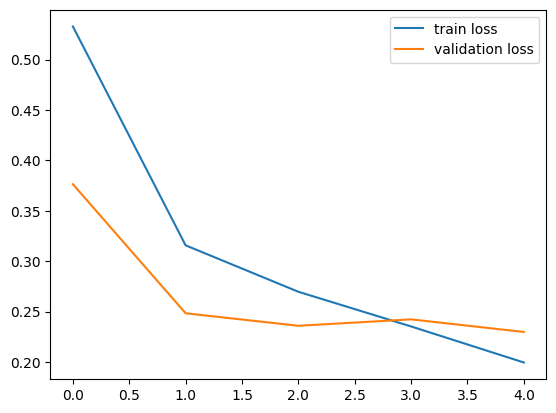

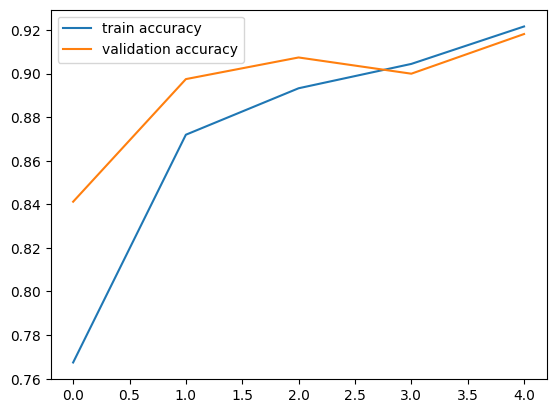

In [25]:
h=history

#plot loss value

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot accuracy value

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()


#Predictive system

Path of the image to be predicted -/content/download.jpeg


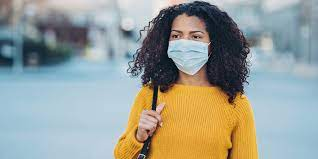

1/1 [==============================] - 0s 22ms/step
[[0.07268536 0.99768376]]
1
Wearing a mask


In [28]:
input_image_path= input("Path of the image to be predicted -")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized =cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128,128,3])

input_prediction =model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)


if input_pred_label==1:
  print('Wearing a mask')
else:
  print('Not wearing a mask')